# Hacker News Dataset Analysis
> This notebook is a quick data profiling of given datasets

In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import import_data


DATA_DIR = '../data'

In [2]:
train = import_data(DATA_DIR)
print('Imported {} lines'.format(len(train.index)))

Imported 881052 lines from 31 files
Imported 881052 lines


In [8]:
train.head(10)

,app_id,clicks,conversions,filters,hits,index,nb_hits,query,query_id,timestamp
0,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...",NaN,Item_production,0,petsburghtherapyservices,3335322a02bfebf7ebf2a80e7b77035f,2018-07-14T00:00:43.371Z
1,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[14462785, 7211514, 16659656, 3029872, 1718990...",Item_production,119174,facebook,76c56c69ed950db5a095849059641c81,2018-07-14T00:04:33.090Z
2,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...",[17479386],Item_production_sort_date,1,Use of AI in the fashion industry,3d72f045b4149ce962478fd0fd6a61de,2018-07-14T00:02:29.537Z
3,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[17339278, 17352526, 17305296, 17524937, 17385...",Item_production,6,Medical research,b03ddf12f453d1bbd8d407fdf423cd2d,2018-07-14T00:04:34.283Z
4,UJ5WYC0L7X,"[{'position': 18, 'timestamp': '2018-07-14T00:...",NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[3686840, 4806852, 15714318, 250704, 9108209, ...",Item_production,6881,startup ideas,a98e5e3d873dfb8f419756542a94b2f1,2018-07-14T00:01:41.774Z
5,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[9784470, 7177388, 17057596, 11424372, 1554226...",Item_production_ordered,590623,sa,bfa116d367b052ea79dc7eb4b8607fe7,2018-07-14T00:00:27.399Z
6,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...",[17527711],Item_production_sort_date,1,Yunno by Zugo,aa3babc2e694e8cae0185eec24fd6951,2018-07-14T00:03:49.029Z
7,UJ5WYC0L7X,"[{'position': 12, 'timestamp': '2018-07-14T00:...",NaN,"[{'operator': ':', 'value': 'story', 'attribut...",NaN,Item_production_ordered,15978973,,14c8b0b1d7ed6f99e9a4e9a8bc196e23,2018-07-14T00:02:56.345Z
8,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[16582136, 11116274, 3078128, 13682022, 159247...",Item_production_ordered,15979004,,1b6d9059384440e7ff9c8eb5f0e1b150,2018-07-14T00:04:27.466Z
9,UJ5WYC0L7X,"[{'position': 1, 'timestamp': '2018-07-14T00:0...",NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[17513576, 14921491, 12174635, 6077832, 156890...",Item_production,819,summer rea,6c104b1d306aecd7518ee22537281ad4,2018-07-14T00:04:55.874Z


In [9]:
train['clicks'][9]

[{'object_id': '17513576',
  'position': 1,
  'timestamp': '2018-07-14T00:04:57.946Z'}]

In [35]:
train.groupby('nb_hits').count()

,app_id,clicks,conversions,filters,hits,index,query,query_id,timestamp,nb_clicks,nb_conversions
nb_hits,,,,,,,,,,,
0,63043,31,2,63004,0,63043,63043,63043,63043,63043,63043
1,90539,6801,278,90504,90501,90539,90539,90539,90539,90539,90539
2,23427,4343,172,23372,23405,23427,23427,23427,23427,23427,23427
3,14918,3335,141,14903,14901,14918,14918,14918,14918,14918,14918
4,11487,2908,109,11465,11470,11487,11487,11487,11487,11487,11487
5,9195,2436,104,9170,9179,9195,9195,9195,9195,9195,9195
6,7633,2142,82,7622,7625,7633,7633,7633,7633,7633,7633
7,7307,1956,69,7286,7298,7307,7307,7307,7307,7307,7307
8,5905,1713,80,5905,5895,5905,5905,5905,5905,5905,5905


In [30]:
# Additionnal features
train['nb_clicks'] = train['clicks'].apply(lambda x: len(x) if isinstance(x, list) else 0)
train['nb_clicks'].max()
train.loc[train['nb_clicks'].idxmax()]['clicks']


[{'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:52:27.571Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:52:27.571Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488321',
  'position': 2,
  'timestamp': '2018-07-10T02:53:09.233Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488321',
  'position': 2,
  'timestamp': '2018-07-10T02:53:09.233Z'},
 {'object_id': '17488408',
  'position': 1,
  'timestamp': '2018-07-10T02:53:04.21Z'},
 {'object_id': '17488408',
  'position'

In [26]:
train['nb_conversions'] = train['conversions'].apply(lambda x: len(x) if isinstance(x, list) else 0)
train['nb_conversions'].max()
train.loc[train['nb_conversions'].idxmax()]['conversions']

[{'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timestamp': '2018-07-10T01:43:31.128Z'},
 {'object_id': '17489564', 'timest

In [27]:
train.loc[train['nb_clicks'].idxmax()]['filters']

[{'attribute': '_tags', 'operator': ':', 'value': 'comment'},
 {'attribute': '_tags', 'operator': ':', 'value': 'author_DoreenMichele'}]

5.0
0.0


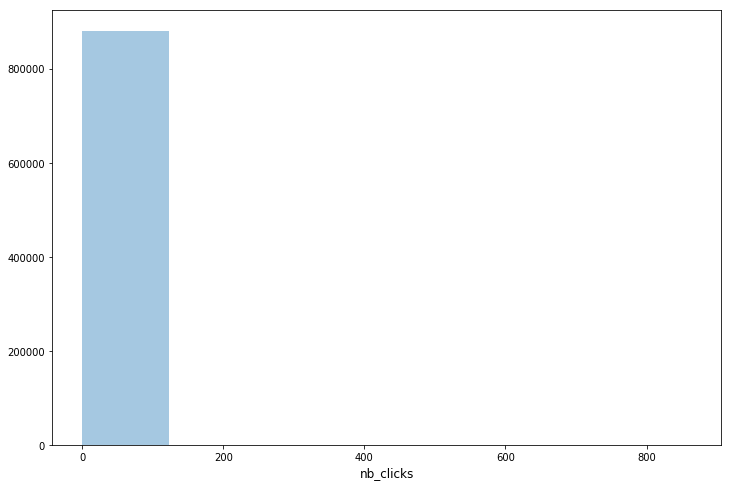

In [28]:
ulimit = np.percentile(train.nb_clicks.values, 99)
llimit = np.percentile(train.nb_clicks.values, 1)
print(ulimit)
print(llimit)
#train_df['clicks'].ix[train_df['clicks']>ulimit] = ulimit
#train_df['clicks'].ix[train_df['clicks']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train.nb_clicks.values, bins=7, kde=False)
plt.xlabel('nb_clicks', fontsize=12)
plt.show()

In [29]:
train.groupby('nb_clicks').count()

,app_id,clicks,conversions,filters,hits,index,nb_hits,query,query_id,timestamp,nb_conversions
nb_clicks,,,,,,,,,,,
0,693116,0,120,687657,604302,693116,693116,693116,693116,693116,693116
1,140774,140774,1829,140701,132792,140774,140774,140774,140774,140774,140774
2,24162,24162,2479,24145,22498,24162,24162,24162,24162,24162,24162
3,8940,8940,1047,8932,8115,8940,8940,8940,8940,8940,8940
4,4631,4631,549,4628,4178,4631,4631,4631,4631,4631,4631
5,2664,2664,371,2663,2415,2664,2664,2664,2664,2664,2664
6,1605,1605,242,1604,1449,1605,1605,1605,1605,1605,1605
7,1027,1027,165,1027,933,1027,1027,1027,1027,1027,1027
8,701,701,92,701,622,701,701,701,701,701,701


In [34]:
train.loc[train['nb_clicks'] == 440]['clicks']

868855    [{'position': 1, 'object_id': '17431609', 'tim...
Name: clicks, dtype: object